In [55]:
from google.colab import drive
drive.mount('/content/drive')

import os
import matplotlib.pyplot as plt
import seaborn as sns
from  torchvision import datasets, transforms



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
data_dir = "/content/drive/MyDrive/RecycleVision/datas/garbage-dataset"

eda_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

#load dataset

eda_dataset = datasets.ImageFolder(data_dir, transform=eda_transform)


classes = eda_dataset.classes
print("Classes:", classes)
print("Total classes:", len(classes))
print("Total images:", len(eda_dataset))

Classes: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Total classes: 10
Total images: 19762


/tmp/ipython-input-267292045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts , palette='viridis')


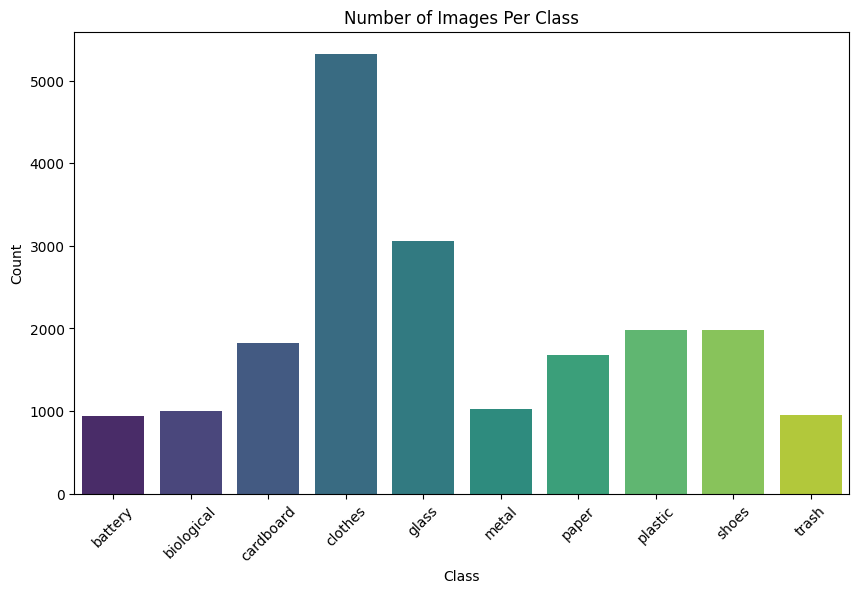

In [57]:
import numpy as np

labels = [label for _, label in eda_dataset.samples]
class_counts = np.bincount(labels)

class_names = eda_dataset.classes

#plot
plt.figure(figsize = (10,6))
sns.barplot(x=class_names, y=class_counts , palette='viridis')
plt.xticks(rotation=45)
plt.title("Number of Images Per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

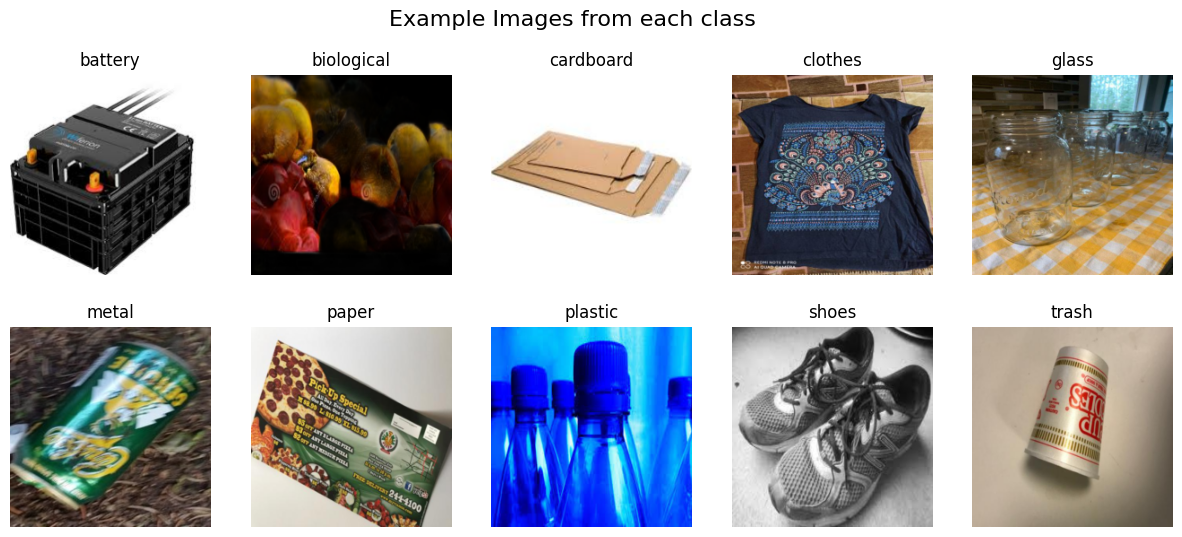

In [58]:
import random

fig, axes = plt.subplots(2,5, figsize=(15,6))

for idx, class_name in enumerate(class_names):
  indices = [i for i,(_, label) in enumerate(eda_dataset.samples) if label == idx]

  sample_idx = random.choice(indices)

  img, label = eda_dataset[sample_idx]

  #plot

  ax = axes[idx//5, idx%5]
  ax.imshow(img.permute(1,2,0))
  ax.set_title(class_name)
  ax.axis('off')

plt.suptitle("Example Images from each class",fontsize = 16)
plt.show()





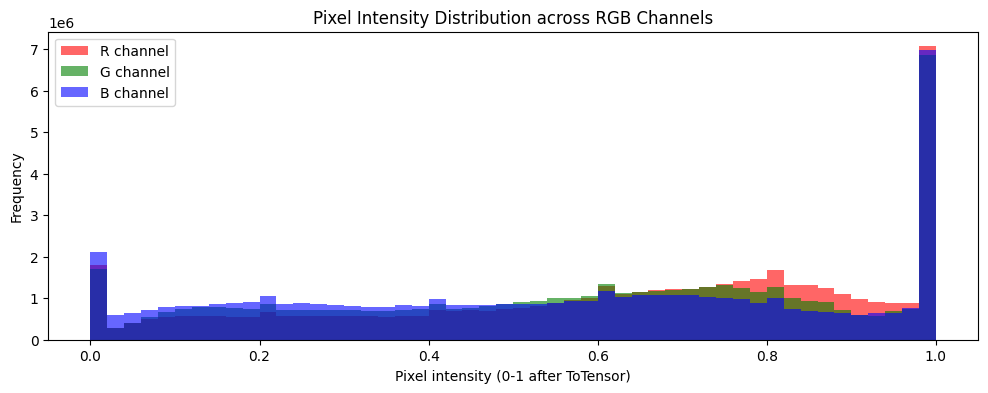

In [62]:
#Pixel Intensity / Color Distribution

import numpy as np

# Take a random subset of images for faster computation (e.g., 1000 samples)
subset_indices = random.sample(range(len(eda_dataset)), 1000)

# Collect pixel values
all_pixels = []

for idx in subset_indices:
    img, _ = eda_dataset[idx]  # shape: [C, H, W]
    img_np = img.permute(1, 2, 0).numpy()  # convert to HWC for easier flattening
    all_pixels.append(img_np.reshape(-1, 3))  # flatten pixels

all_pixels = np.vstack(all_pixels)  # shape: (N, 3)

# Plot histograms for R, G, B
plt.figure(figsize=(12, 4))
colors = ['r', 'g', 'b']
for i, col in enumerate(colors):
    plt.hist(all_pixels[:, i].ravel(), bins=50, color=col, alpha=0.6, label=f'{col.upper()} channel')

plt.title("Pixel Intensity Distribution across RGB Channels")
plt.xlabel("Pixel intensity (0-1 after ToTensor)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
